# protospacer flanking sequences data exploration

In [1]:
# 05/07
# Made by L-F-S
# At the University Of Trento, Italy

import os

import sys
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
# for clustal alignments
#from Bio import AlignIO
#from Bio.Align.Applications import ClustalwCommandline
#from Bio.Align import AlignInfo
# to make logos
import logomaker as lm

feature="Cas9" #WARNING!!! CHANGE THIS!!
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/8pamsearch/out/"
seqid ="LPEAHEHG_01071"   # MANUAL INPUT
outdir=datadir+seqid+"/"


Matplotlib is building the font cache using fc-list. This may take a moment.


### Load file

In [2]:
PAM_dataset_name="dataset_flanking_sequences_of_putative_protospacers"
PAMdata=pd.read_csv(outdir+PAM_dataset_name, header=None)
PAMdata.head()

,0,1,2,3,4,5
0,NODE_2665_length_6227_cov_8.10904,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCACATGTT...,AsnicarF_2017__MV_FEM4_t2Q15.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
1,NODE_2926_length_6330_cov_16.3025_ID_8983,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCACATGTT...,AsnicarF_2017__MV_FEM4_t2Q15_megahit.contigs_f...,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
2,NODE_14221_length_1859_cov_11.0516,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCCXXXXXX...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
3,NODE_1835_length_8657_cov_5.01686,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCCAATGTT...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
4,NODE_348_length_26720_cov_4.00548,TTATGAGCGCAACCCGCAACCCCTATTACCAGCTGCCCGGTGGTAC...,GCAGATCCAACGAAAACTGCTGCGGGTGGCTGGGCGGCCAGCCCGG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTGCCCGGCGACGTGCGTGTGAGTGATACG


col0: contig, col1: upstream flanking sequence, col1: downtream flanking sequence, col3: samplename col4: bin (0 if unbinned)  col5: protospacer

In [3]:
PAMdata.shape

(2426, 6)

## Check length of flanking regions

### Upstream

In [4]:
PAMdata[1].str.count("").value_counts()

51    2426
Name: 1, dtype: int64

In [5]:
print(PAMdata[1].shape,PAMdata[1].dropna().shape)

(2426,) (2426,)


### Downstream

In [7]:
#count how many downstream ar different from 51
PAMdata[2].str.count("").value_counts()

51    2426
Name: 2, dtype: int64

In [8]:
print(PAMdata[2].shape,PAMdata[2].dropna().shape)

(2426,) (2426,)


## Confirm absence of Nans

In [9]:
#only downstream NAs:
PAMdata[PAMdata[2].isnull()].head(30)

,0,1,2,3,4,5


In [10]:


PAMdata[PAMdata[2].isnull()].shape

(0, 6)

## chck if some sequences are shorter (with x)
### Upstream


In [11]:
### upstream:
PAMdata[1].str.count("X").value_counts().sort_index()
# n' X   # n of sequences with that n of X

0     2304
1        4
4        1
5        2
6        1
7        2
8        1
9        3
11       2
13       2
14       6
16       1
17       1
18       1
19       3
20       2
21       2
22       3
26       2
27      11
28       1
29       2
35       4
37       2
38       1
39       5
41       2
45       1
47       3
49       4
50      47
Name: 1, dtype: int64

### Downstream

In [12]:
PAMdata[2].str.count("X").value_counts().sort_index()


0     2334
3        2
5       11
7        1
9        3
10       6
11       3
13       1
15       5
16       1
17       2
18       9
19       3
21       6
22       1
25       2
26       1
27       1
28       1
29       2
31       2
33       4
34       1
35       2
38       1
39       1
41       7
42       1
45       1
46       1
47       1
48       1
49       1
50       7
Name: 2, dtype: int64

In [13]:
#PAMdata=PAMdata.dropna()
PAMdata.shape

(2426, 6)

# Sequence logos

In [ ]:
#versione dataset:


In [ ]:
# This must take as input a dictionary of tuples
# with flanking regions for all porotspacers. How do we enlarge the dictionary now? 
# Maybe instead of a dictionary we write a little file: 
# col0: contigname (of target contig with protospacer) 
# col1: upstream seq, col2: downstream sequence col3: samplename (old, epasolli), 
# col4: bin name if binned (old, epasolli), otherwise 0 (NOT USED IN CODE BELOW YET) 
#  col5: PROTOSPACER sequence
# so all this code below in this box will probly be obsolete

#all_flanking_sequences=open(outdir+all_flanking_file,"r")
#upstream_seqs, downstream_seqs, upstream_seqs_rvc, downstream_seqs_rvc, = [],[],[],[]
#for line in all_flanking_sequences.readlines():
  #  #target_contig=line.strip("\n").split(",")[0]
 #   up_in_cont=line.strip("\n").split(",")[1]
   # down_in_cont=line.strip("\n").split(",")[2]
   # #cont_sample=line.strip("\n").split(",")[3]
   # upstream_seqs.append(up_in_cont)
   # upstream_seqs_rvc.append(str(Seq(up_in_cont).reverse_complement()))
   # downstream_seqs.append(down_in_cont)
  #  downstream_seqs_rvc.append(str(Seq(down_in_cont).reverse_complement()))
#f.close()

In [14]:
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata[1])
counts_mat.to_csv(outdir+"upstream.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,1190.0,112.0,769.0,233.0,122.0
1,99.0,42.0,685.0,1482.0,118.0
2,867.0,138.0,298.0,1005.0,118.0
3,318.0,476.0,30.0,1484.0,118.0
4,93.0,62.0,891.0,1263.0,117.0


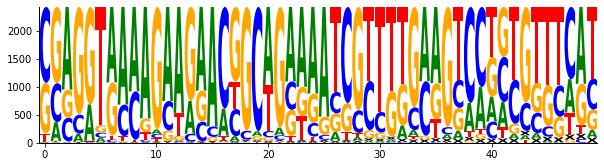

In [23]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.logo.pdf")

In [25]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.to_csv(outdir+"down.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,9.0,1355.0,906.0,149.0,7.0
1,341.0,694.0,1362.0,21.0,8.0
2,1476.0,426.0,501.0,14.0,9.0
3,146.0,340.0,1923.0,7.0,10.0
4,644.0,15.0,1742.0,14.0,11.0


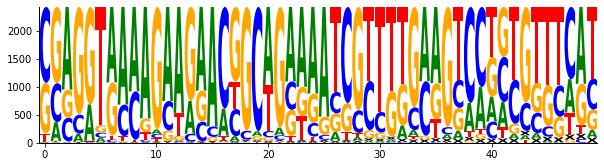

In [28]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.logo.pdf")

In [63]:
# controlla che non siano ripetuti i dati
# o che non sian0 repeats
# chiedi a Ade se c'è qualche modo / possibilità di vedere se ci sia una certa dupliczione nei contigs unfiltered

###  try filtering out binned ones..

In [27]:
PAMdata_unbinned=PAMdata[PAMdata[4]=="0"]
print(PAMdata_unbinned.shape)

(2259, 6)


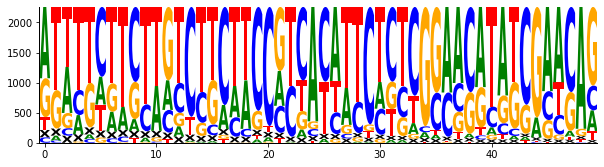

In [29]:
#redo the same stuff
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.unbinned.logo.pdf")

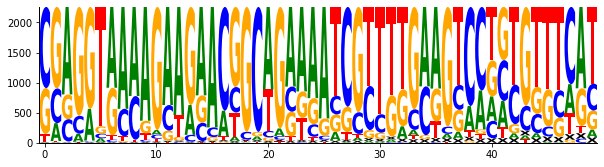

In [30]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata_unbinned[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.unbinned.logo.pdf")

In [72]:
ATTTTCTTCTTGTCTTCCGTCACATTCTCTCGGAACATATCGAACAGCTTCTGTGCCATTTCCTCTATGACAGAATCCGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCCTGTGTTTCAT

NameError: name 'ATTTTCTTCTTGTCTTCCGTCACATTCTCTCGGAACATATCGAACAGCTTCTGTGCCATTTCCTCTATGACAGAATCCGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCCTGTGTTTCAT' is not defined